#Representação das Equações de Lorenz

---

Projeto desenvolvido na disciplina de Modelagem e Simulação que representa o funcionamento do [Equações de Lorenz](https://pt.wikipedia.org/wiki/Atractor_de_Lorenz). Lorenz criou um conjunto de três equações (que posteriormente foram chamadas de Equações de Lorenz) para representar comportamentos dinâmicos. As equações do matemático fazem parte do estudo da [Teoria do Caos](https://pt.wikipedia.org/wiki/Teoria_do_caos#Equa%C3%A7%C3%B5es_de_Lorenz)

![Representação gráfica das equações de Lorenz](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)

### Importando biblotecas

Para criar a representação será necessário utilizar bibliotecas, as bibliotecas utilizadas foram:


*   [Numpy](https://numpy.org/)
*   [Scipy](https://scipy.org/)
*   [Matplotlib](https://matplotlib.org/)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')

### Determinação de estados iniciais

In [2]:
estado0 = [1.0,1.0,1.0]
estado0A = [1.002321, 1.098281, 1.029201]   
estado0B = [1.002, 1.098, 1.029]

In [3]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0


In [4]:
def fevolucao(estado, tempo):
  x, y, z = estado  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

In [5]:
t = np.arange(0.0,100.0,0.01)
estadosA = odeint(fevolucao, estado0A, t)
estadosB = odeint(fevolucao, estado0B, t)

### Execução Principal

#### Estática

In [6]:
print(estadosA)
print(estadosB)

[[  1.002321     1.098281     1.029201  ]
 [  1.02402813   1.35880121   1.01438519]
 [  1.06872727   1.62582053   1.0030832 ]
 ...
 [ -7.63830285 -12.57286695  16.6186384 ]
 [ -8.14396579 -13.31924967  17.18972442]
 [ -8.67250657 -14.06285402  17.87379511]]
[[ 1.002       1.098       1.029     ]
 [ 1.023707    1.35843903  1.01418238]
 [ 1.06839831  1.62537695  1.0028768 ]
 ...
 [-1.13968027 -0.51690203 19.88474095]
 [-1.08464158 -0.60431672 19.36763206]
 [-1.04318007 -0.6922495  18.86478422]]


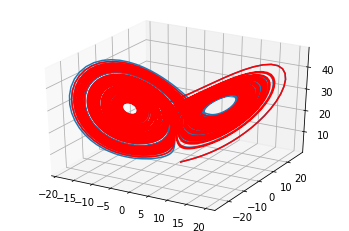

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(estadosA[:,0], estadosA[:,1], estadosA[:,2])
ax.plot(estadosB[:,0], estadosB[:,1], estadosB[:,2],'r')
plt.show()

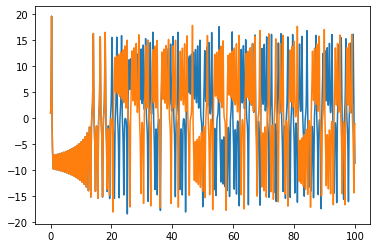

In [8]:
plt.plot(t[:],estadosA[:,0])
plt.plot(t[:],estadosB[:,0])

#### Animado

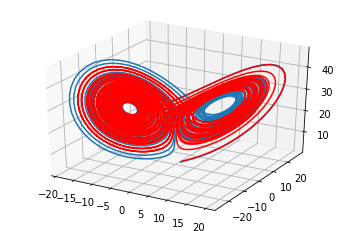

In [12]:
estado_animado0A = [1.002321, 1.098281, 1.029201]
estado_animado0B = [1.2, 1.2, 1.3]
max_tempo = [0.0,1,0.01]
tempo = np.arange(max_tempo[0], max_tempo[1], max_tempo[2])

def generate_data():
    return estados_animado0A, estados_animado0B

def update(estados_animado0A):
    global tempo, estado_animado0B, estado_animado0B
    estados_animado0A = odeint(fevolucao, estado_animado0A, tempo)
    estados_animado0B = odeint(fevolucao, estado_animado0B, tempo)
    ax.clear()
    ax.plot(estados_animado0A[:,0], estados_animado0A[:,1], estados_animado0A[:,2])
    ax.plot(estados_animado0B[:,0], estados_animado0B[:,1], estados_animado0B[:,2],'r')
    max_tempo[1] += 0.4
    tempo = np.arange(max_tempo[0], max_tempo[1], max_tempo[2])

def data_gen():
    while True:
        yield generate_data()

fig = plt.figure()
ax = fig.gca(projection='3d')

estados_animado0A = odeint(fevolucao, estado_animado0A, tempo)
estados_animado0B = odeint(fevolucao, estado_animado0B, tempo)

ax.plot(estados_animado0A[:,0], estados_animado0A[:,1], estados_animado0A[:,2])

ani = animation.FuncAnimation(fig, update, data_gen, interval=300, save_count=100)

HTML(ani.to_html5_video())

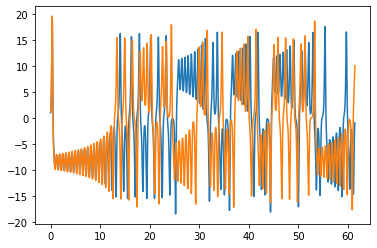

In [11]:
estado_animado0A = [1.002321, 1.098281, 1.029201]
estado_animado0B = [1.2, 1.2, 1.3]
max_tempo = [0.0,1.0,0.01]
tempo = np.arange(max_tempo[0], max_tempo[1], max_tempo[2])

def generate_data():
    return estados_animado0A, estados_animado0B

def update(estados_animado0A):
    global tempo, estado_animado0B, estado_animado0B
    estados_animado0A = odeint(fevolucao, estado_animado0A, tempo)
    estados_animado0B = odeint(fevolucao, estado_animado0B, tempo)
    ax.clear()
    ax.plot(tempo[:],estados_animado0A[:,0])
    ax.plot(tempo[:],estados_animado0B[:,0])
    max_tempo[1] += 0.4
    tempo = np.arange(max_tempo[0], max_tempo[1], max_tempo[2])

def data_gen():
    while True:
        yield generate_data()

fig = plt.figure()
ax = fig.gca()


estados_animado0A = odeint(fevolucao, estado_animado0A, tempo)
estados_animado0B = odeint(fevolucao, estado_animado0B, tempo)

ax.plot(tempo[:],estados_animado0A[:,0])
ax.plot(tempo[:],estados_animado0B[:,0])

ani = animation.FuncAnimation(fig, update, data_gen, interval=100, save_count=150)

HTML(ani.to_html5_video())


## Autoria


---



Programa desenvolvido por Lisandra Melo (<mendie73@gmail.com>).

&copy; IMD/UFRN 2021-2022.